# Problem Statement

In [264]:
#1. Develop a statistical model for predicting bad loans
#2. Use the model to identify the most important drivers of bad loans
#3. With these new insights, make recommendations to avoid funding bad loans

# Required Packages and Libraries

In [265]:
#importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#import libraries for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#import libraries for model evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

# importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#import libraries for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#import libraries for model evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

#import libraries for KNN
from sklearn.neighbors import KNeighborsClassifier

#import library for ignoring warnings in the output
import warnings
warnings.filterwarnings('ignore')

#import libraries for KNN
from sklearn.neighbors import KNeighborsClassifier

#import library for ignoring warnings in the output
import warnings
warnings.filterwarnings('ignore')

In [266]:
#defining working directory
os.chdir('C:\\Users\\pallavvi\\Desktop\\ProjMat\\Data Science\\Data_Science_Course\\Piyush\\Projects\\Upload_Online\\Loan_status_prediction')

In [267]:
#importing dataset
target_csv = "Loan_Training_data.csv"
loan_df = pd.read_csv(target_csv,sep=',')

# Data Wrangling

In [268]:
#first five observations
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [269]:
#data info
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [270]:
#listing all the variables/fields
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [271]:
#shape of the data(number of rows and number of columns)
loan_df.shape

(614, 13)

In [272]:
#Finding how many features are categories/numerical in data set
print(len(loan_df._get_numeric_data().columns))                  #numerical variables
len(loan_df.columns)-len(loan_df._get_numeric_data().columns)    #categorical variables

5


8

In [273]:
#finding How many columns have got some missing values
print(loan_df.isnull().any().sum())

7


In [274]:
#finding How many rows have got some missing values
print(loan_df.isnull().any(axis=1).sum())

134


In [275]:
#Finding How many column are having all missing values
print(loan_df.isnull().all().sum())

0


In [276]:
#Finding How many rows are having all missing values
print(loan_df.isnull().all(axis=1).sum())

0


In [277]:
#drop duplicate rows- if any
loan_df = loan_df.drop_duplicates(keep='first')

In [278]:
#dropping unimportant variables
#drop_cols = ['Education']
#loan_df = loan_df.drop(drop_cols,axis=1)

In [279]:
#Finding How many/what percentage of applications got approved /rejected? This is basically to check class imbalance.

print(pd.value_counts(loan_df['Loan_Status'].values, sort=False))                                #Gives count
round(100*((pd.value_counts(loan_df['Loan_Status'].values, sort=False))/len(loan_df.index)),2)   #Gives %

Y    422
N    192
dtype: int64


Y    68.73
N    31.27
dtype: float64

In [280]:
#Identifying if there are outliers in any feature using describe()
#summary statistics (gives mean , median, std, min, max for continuous numerical data only)

loan_df.describe()

#Explanation:
#1. if 25%,50%,75% values are far away from mean value that means there are outliers in that feature

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [281]:
#Identifying if there are outliers in any feature using quantile()
Q1 = loan_df.quantile(0.25)
Q3 = loan_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

lower_limit  = Q1-1.5*IQR
print(lower_limit)

upper_limit = Q3+1.5*IQR
print(upper_limit)

print(((loan_df['ApplicantIncome'] > 10171.250) | (loan_df['ApplicantIncome'] < 1498.750)).sum())      #gives count
print(((loan_df['CoapplicantIncome'] > 5743.125) | (loan_df['CoapplicantIncome'] < 3445.875)).sum())
print(((loan_df['LoanAmount'] > 270.000) | (loan_df['LoanAmount'] < 2.000)).sum())
print(((loan_df['Loan_Amount_Term'] > 360.000) | (loan_df['Loan_Amount_Term'] < 360.000)).sum())
print(((loan_df['Credit_History'] > 1) | (loan_df['Credit_History'] < 1)).sum())

ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             68.00
Loan_Amount_Term        0.00
Credit_History          0.00
dtype: float64
ApplicantIncome     -1498.750
CoapplicantIncome   -3445.875
LoanAmount             -2.000
Loan_Amount_Term      360.000
Credit_History          1.000
dtype: float64
ApplicantIncome      10171.250
CoapplicantIncome     5743.125
LoanAmount             270.000
Loan_Amount_Term       360.000
Credit_History           1.000
dtype: float64
61
558
39
88
89


In [282]:
#finding the % of nulls in each column
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)

Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [283]:
#removing nulls from Loan Amount, Credit History, Loan amount term 
loan_df = loan_df[~np.isnan(loan_df['LoanAmount'])]
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)

loan_df = loan_df[~np.isnan(loan_df['Credit_History'])]
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)

loan_df = loan_df[~np.isnan(loan_df['Loan_Amount_Term'])]
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)

#alternate way to remove NA's from columns
#loan_df.dropna(subset = ["Married", "Gender","Self_Employed","Loan_Amount_Term","Dependents","LoanAmount","Credit_History"] , inplace=True)

Loan_ID              0.00
Gender               2.27
Married              0.38
Dependents           2.27
Education            0.00
Self_Employed        4.73
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           0.00
Loan_Amount_Term     0.00
Credit_History       0.00
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [284]:
#removing nulls from self_employed, Gender, Dependents, Married(categorical variables)
print(loan_df['Self_Employed'].value_counts())
loan_df.loc[pd.isnull(loan_df['Self_Employed']), ['Self_Employed']] = 'No'
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)

print(loan_df['Gender'].value_counts())
loan_df.loc[pd.isnull(loan_df['Gender']), ['Gender']] = 'Male'
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)

print(loan_df['Dependents'].value_counts())
loan_df.loc[pd.isnull(loan_df['Dependents']), ['Dependents']] = '0'
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)

print(loan_df['Married'].value_counts())
loan_df.loc[pd.isnull(loan_df['Married']), ['Married']] = 'Yes'
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)

#alternate way to find the count per feature
#loan_df.groupby(["Dependents"]).size()

No     434
Yes     70
Name: Self_Employed, dtype: int64
Male      422
Female     95
Name: Gender, dtype: int64
0     295
2      92
1      85
3+     45
Name: Dependents, dtype: int64
Yes    339
No     188
Name: Married, dtype: int64


Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [285]:
#gives unique values of a feature/column
set(loan_df['Married'])

#alternate way to find the unique values
#loan_df.Married.unique()

{'No', 'Yes'}

In [286]:
#Finding the fraction of rows cost
print('data left(%):',(len(loan_df.index)/614)*100)

data left(%): 86.15635179153095


In [287]:
#calculating the combined income and inserting a new column to loan_df
loan_df['comb_income'] = pd.DataFrame(loan_df['ApplicantIncome']+loan_df['CoapplicantIncome'])

In [288]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,comb_income
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0


In [289]:
#dropping columns applicant and coapplicant income 
drop_cols = ['ApplicantIncome','CoapplicantIncome']
loan_df = loan_df.drop(drop_cols,axis=1)

In [290]:
#sorting with respect to a variable in descending order
loan_df = loan_df.sort_values(by = 'comb_income',ascending = False)

In [291]:
loan_df.shape

(529, 12)

In [292]:
#converting the categorical target variable into dummies (0,1's)
loan_df['Status'] = pd.get_dummies(loan_df['Loan_Status'], drop_first=True)
loan_df.drop(['Loan_Status'], axis=1, inplace=True)

In [293]:
#if there is a space in columnnames then replace it
loan_df.columns = loan_df.columns.str.replace(' ','')

In [294]:
'''The functions takes column name as an argument and returns the top and bottom observation in that dataframe'''
def min_max_values(col):
    
    top = loan_df[col].idxmax()
    top_obs = pd.DataFrame(loan_df.loc[top])
    
    bottom = loan_df[col].idxmin()
    bottom_obs = pd.DataFrame(loan_df.loc[bottom])
    
    min_max_obs = pd.concat([top_obs, bottom_obs], axis=1)
    
    return min_max_obs

In [295]:
#applicable only for numerical variable
min_max_values('comb_income')
min_max_values('LoanAmount')

,171,568
Loan_ID,LP001585,LP002840
Gender,Male,Female
Married,Yes,No
Dependents,3+,0
Education,Graduate,Graduate
Self_Employed,No,No
LoanAmount,700,9
Loan_Amount_Term,300,360
Credit_History,1,1
Property_Area,Urban,Urban


# Visualization of Numerical / Quantitative Variables(Univariate Analysis)

# Histogram, Distplot

(array([439.,  70.,  12.,   0.,   4.,   1.,   1.,   1.,   0.,   1.]),
 array([ 1442. ,  9397.8, 17353.6, 25309.4, 33265.2, 41221. , 49176.8,
        57132.6, 65088.4, 73044.2, 81000. ]),
 <a list of 10 Patch objects>)

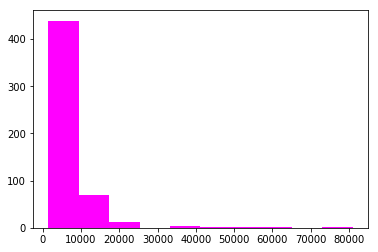

In [296]:
#histogram of continuous numerical variables
plt.hist(loan_df['comb_income'],color='Magenta')

#observation:
#1. majority of people have combined income between a range of approx.1000 to 10000
#2. data spread is very high on right hand side
#3. people with income 40000 to 80000 are far away from the other set of people 
#4. data on tail side can be removed for analysis

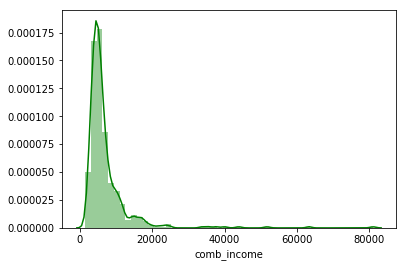

In [297]:
#probability Distribution Function
sns.distplot(loan_df['comb_income'],color='green')

#observation:
#1. In histogram we get the count/actual value for every data on x axis, But here we get % instead of actual value
#2. Area under the curve here is equal to '1'
#3. % value always lie between '0' and '1'

(array([ 66., 275., 128.,  30.,  13.,   6.,   4.,   3.,   3.,   1.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <a list of 10 Patch objects>)

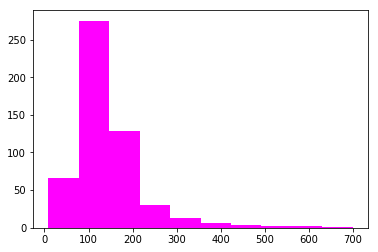

In [298]:
#histogram of continuous numerical variables
plt.hist(loan_df['LoanAmount'],color='Magenta')

#observation:
#1. majority of people applied for loan amount between a range of approx.90 to 130
#2. data spread is high on right hand side
#3. people having loan_amount applied=500-700 are far away from the other set of people 
#4. data on tail side can be removed for analysis

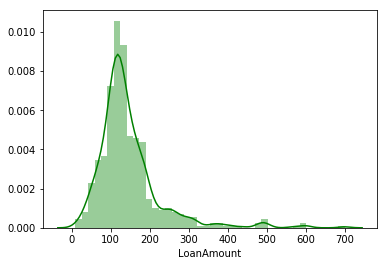

In [299]:
#probability Distribution Function
sns.distplot(loan_df['LoanAmount'],color='green')

#observation:
#1. In histogram we get the count/actual value for every data on x axis, But here we get % instead of actual value
#2. Area under the curve here is equal to '1'
#3. % value always lie between '0' and '1'

(array([  4.,   6.,   0.,  41.,   2.,  10.,   0., 452.,   0.,  14.]),
 array([ 36. ,  80.4, 124.8, 169.2, 213.6, 258. , 302.4, 346.8, 391.2,
        435.6, 480. ]),
 <a list of 10 Patch objects>)

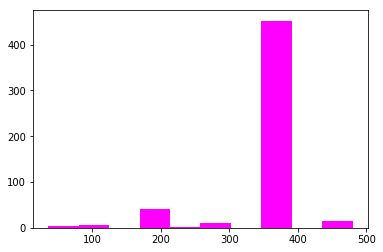

In [300]:
#histogram of continuous numerical variables
plt.hist(loan_df['Loan_Amount_Term'],color='Magenta')

#observation:
#1. the data is highly distributed 
#2. maximum people have term amount between 350 to 390 approx.

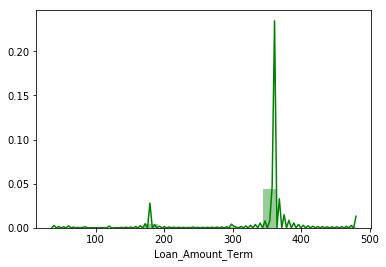

In [301]:
#probability Distribution Function
sns.distplot(loan_df['Loan_Amount_Term'],color='green')

#observation:
#1. In histogram we get the count/actual value for every data on x axis, But here we get % instead of actual value
#2. Area under the curve here is equal to '1'
#3. % value always lie between '0' and '1'

(array([ 79.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 450.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

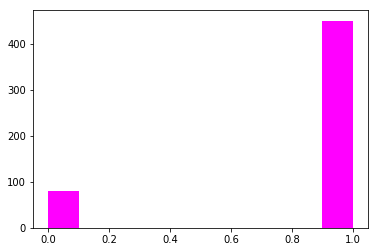

In [302]:
#histogram of continuous numerical variables
plt.hist(loan_df['Credit_History'],color='Magenta')

#observation:
#1. can be better represented by categopry
#2. maximum people have credit history between 0.9 to 1.0 approx.

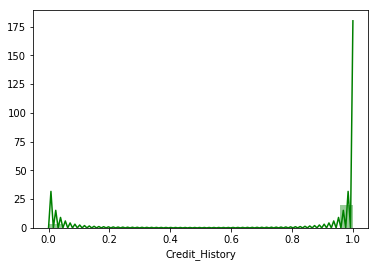

In [303]:
#probability Distribution Function
sns.distplot(loan_df['Credit_History'],color='green')

#observation:
#1. In histogram we get the count/actual value for every data on x axis, But here we get % instead of actual value
#2. Area under the curve here is equal to '1'
#3. % value always lie between '0' and '1'

In [304]:
#select all numerical variables and analyzing them
loan_num = loan_df.select_dtypes(include=['float64','int64'])
loan_num.head()

,LoanAmount,Loan_Amount_Term,Credit_History,comb_income
409,360.0,360.0,0.0,81000.0
333,490.0,180.0,1.0,63337.0
171,700.0,300.0,1.0,51763.0
185,120.0,360.0,1.0,43897.0
155,600.0,180.0,0.0,39999.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021EAF5FB6D8>,
      dtype=object)

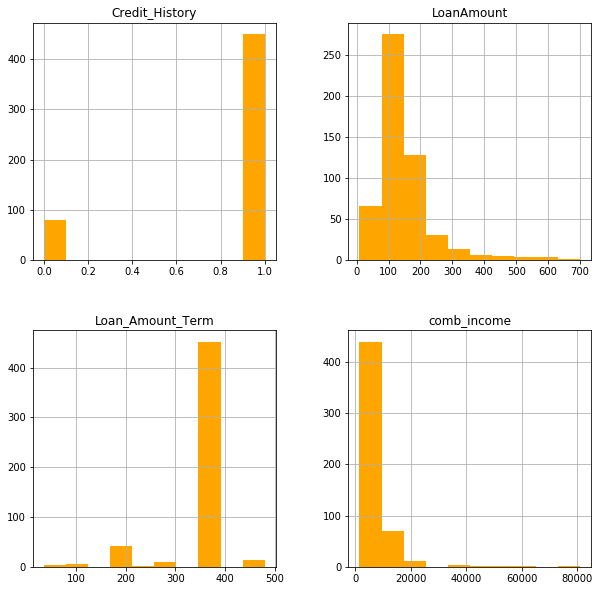

In [305]:
loan_num.hist(color='orange',histtype='bar',stacked=True,fill=True,figsize=(10,10))

#observation:
#1. Credit history can be better represented by making it as 'Category'
#2. For Loan amount Term a) the data is highly distributed 
#                        b) maximum people have term amount between 350 to 390 approx.
#3. For Loan Amount a) majority of people applied for loan amount between a range of approx.90 to 130
#                   b) data spread is high on right hand side
#                   c) people having loan_amount applied=500 are far away from the other set of people 
#                   d) data on tail side can be removed for analysis
#4. For Comb Income a) majority of people have combined income between a range of approx.1000 to 10000
#                   b) data spread is very high on right hand side
#                   c) people with income approx.38000 are far away from the other set of people 
#                   d) data on tail side can be removed for analysis

# Correlation, Pairplot, Heatmap

In [306]:
#Correlation with the variable of interest
comb_income_corr = loan_num.corr()['comb_income'][:-1]  #[:-1] is for not taking the correlation with variable itself
comb_income_corr

#observation:
#1. LoanAmount is directly proportional to combined income, and other numerical variables are inversely proportional
#2. LoanAmount has +ve relation and other two have -ve relation
#3. loan amount has medium relation with comb_income, so as the combined income increases the loan amount will also increase
#4. There is no relation between comb_income and (loan_amoun_term and credit history), since correlation value is < 0.1

LoanAmount          0.615632
Loan_Amount_Term   -0.061205
Credit_History     -0.027265
Name: comb_income, dtype: float64

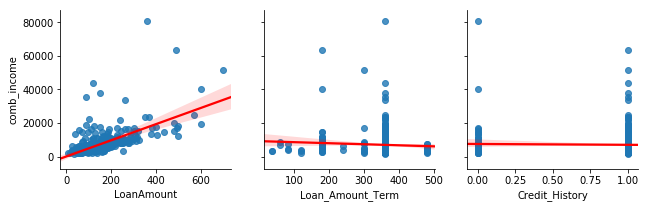

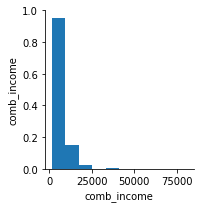

In [307]:
#correlation plots using 'pairplots'
for i in range(0,len(loan_num.columns),3):
    sns.pairplot(loan_num,y_vars=['comb_income'],
                 x_vars=loan_num.columns[i:i+3],
                 kind='reg',
                 plot_kws={'line_kws':{'color':'red'}},
                 height=3
                )

#observation:
#1. If the dots are downward sloping then negative relation, upward sloping positive relation
#2. comb_income and loan_amount has medium positive relationship as the variance is medium
#3. Useful for detecting the outliers/extreme values

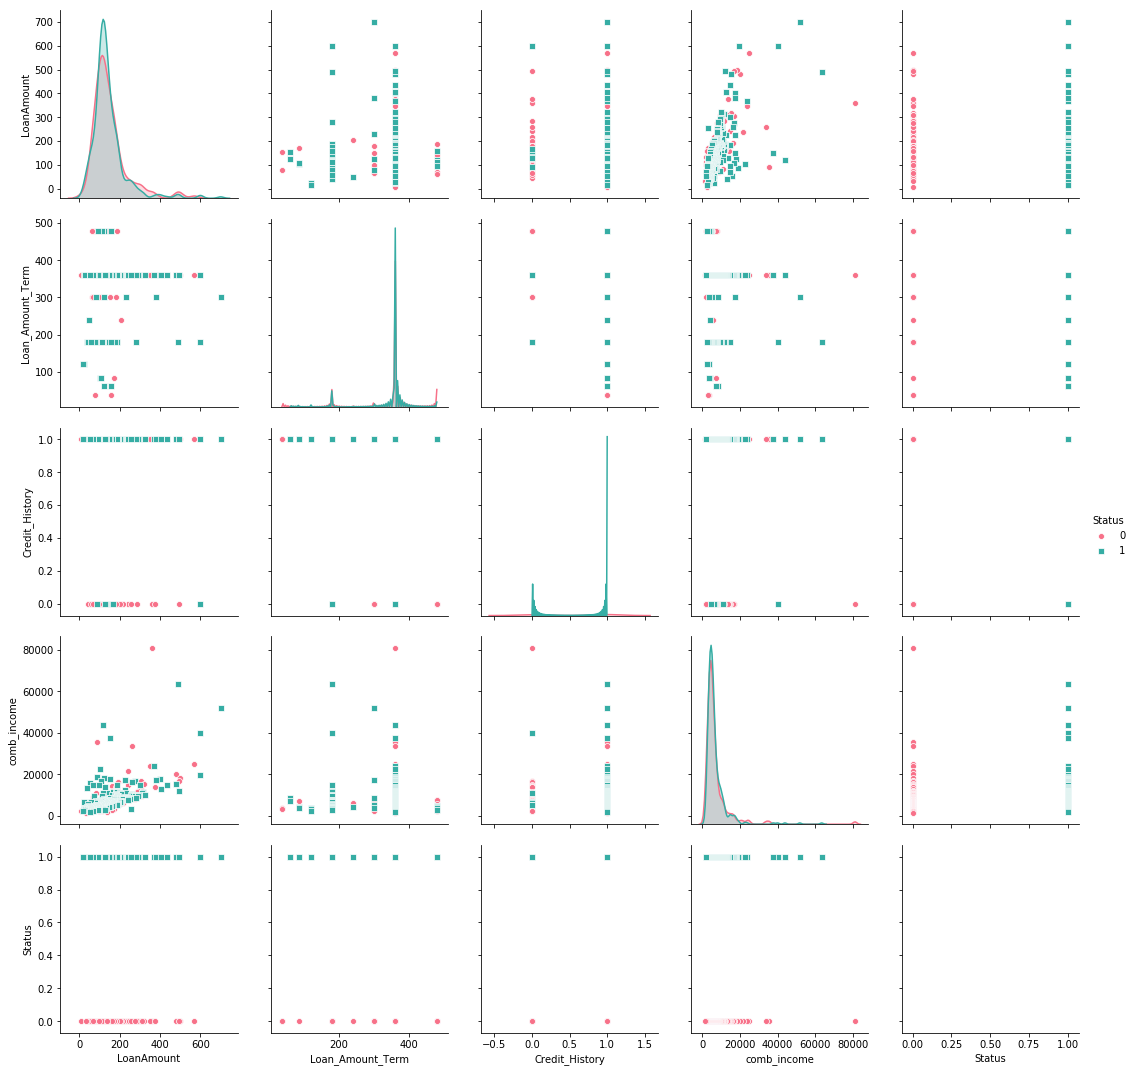

In [308]:
sns.pairplot(loan_df, 
             hue='Status', 
             palette='husl', 
             height=3, 
             markers=["o", "s"], 
             diag_kind="kde")

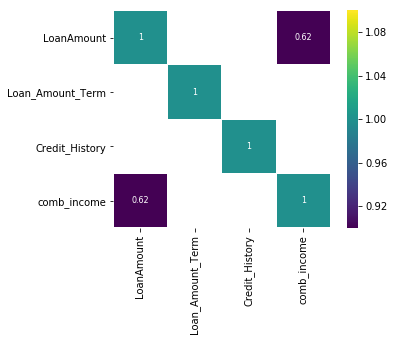

In [309]:
#plotting significant correlation in one map ('heatmap')
corr = loan_num.corr()
sns.heatmap(corr[(corr >= 0.5)], 
            cmap='viridis', 
            annot=True, 
            vmax=1.0, 
            vmin=1.0, 
            linewidths=0.1, 
            annot_kws={"size":8}, 
            square=True
           )

#observation:
#1. there is no relation between the loan_amount, loan_amount term anmd credit history
#2. squares which have no color indicates that no relationship
#3. there is a high relation between loan amount and comb_income

# Visualization of Numerical variables(Bivariate Analysis)

# Regplot, Lmplot

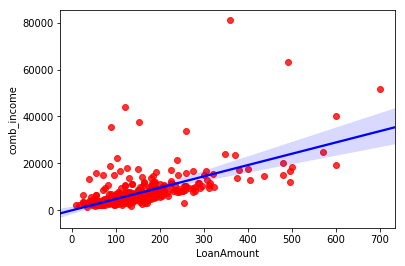

In [310]:
#regression Plot
sns.regplot(loan_df['LoanAmount'],loan_df['comb_income'],scatter_kws={"color": "red"}, line_kws={"color": "blue"})

#observation:
#1. there is strong positive relationship between loan_amount and comb_income

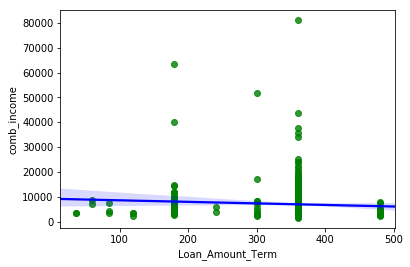

In [311]:
#regression Plot
sns.regplot(loan_df['Loan_Amount_Term'],loan_df['comb_income'],scatter_kws={"color": "green"}, line_kws={"color": "blue"})

#observation:
#1. there is no relationship between loan_amount_term and comb_income

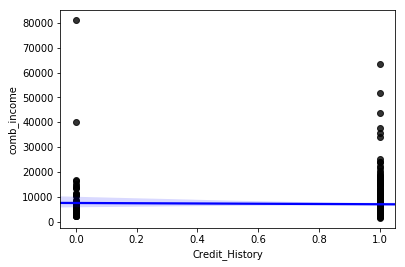

In [312]:
#regression Plot
sns.regplot(loan_df['Credit_History'],loan_df['comb_income'],scatter_kws={"color": "black"}, line_kws={"color": "blue"})

#observation:
#1. there is no relation between credit history and com_income

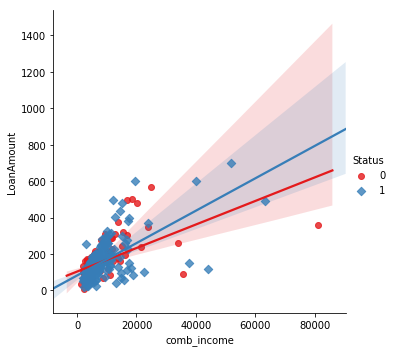

In [313]:
#linear plot
sns.lmplot(x="comb_income" , y = "LoanAmount" , hue = "Status" , markers=["o", "D"], data = loan_df, palette='Set1')

#observation:
#1. As the comb_income increase loan amount also increases

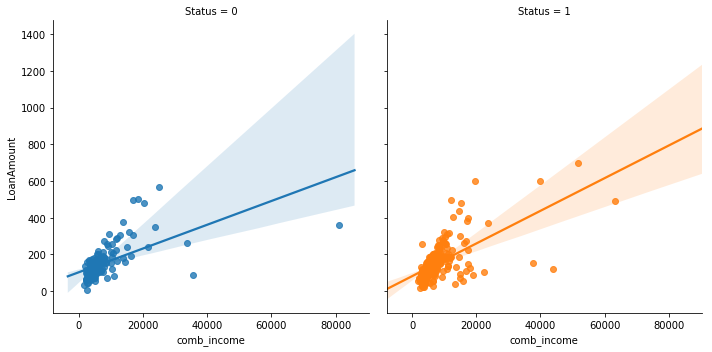

In [314]:
#linear plot
sns.lmplot(x="comb_income" , y = "LoanAmount" ,hue='Status', col = "Status", data=loan_df)

#observation:
#1. base on status impact of comb_income on loan amount is visualized

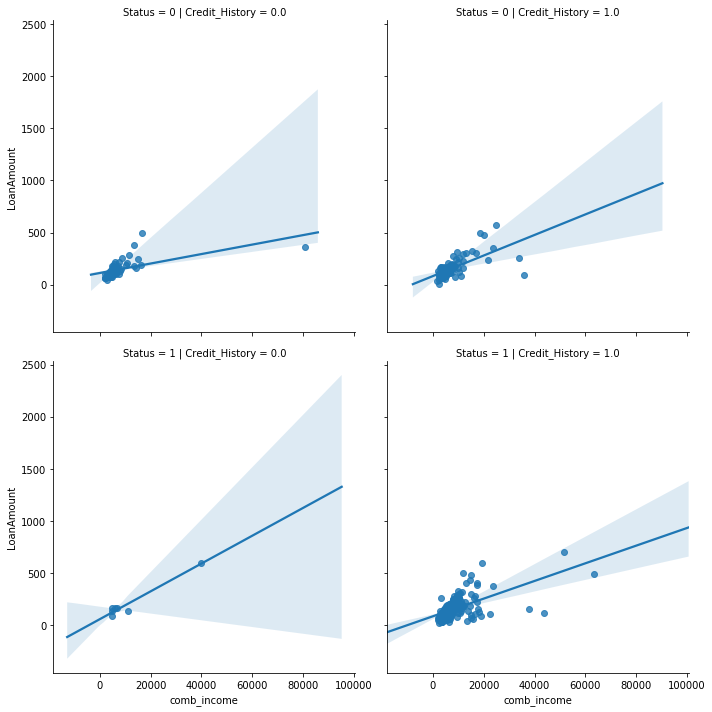

In [315]:
#linear plot
sns.lmplot(x="comb_income" , y = "LoanAmount" ,row='Status', col = "Credit_History", data=loan_df)

#observation:
#1. condition of two variables status and credit history on comb_income affecting loan_amount
#2. credit history plays a role in approval and rejection of loan application

# JointPlot

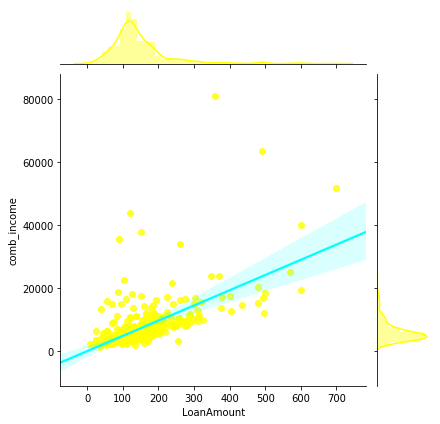

In [316]:
#joint plot with kind=reg
sns.jointplot(x='LoanAmount', y='comb_income', data=loan_df, kind='reg', color='yellow',joint_kws={'line_kws':{'color':'cyan'}})

#Observation:
#1. Curve on the top shows distribution of Loan Amount
#2. Curve on the right shows distribution of comb_income
#3. Plot shows as loan amount increases com_income requriement also increase i.e loan_amount is directly proportional to comb_income

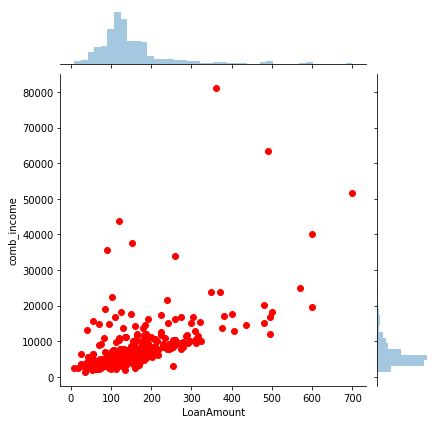

In [317]:
#joint plot with kind=scatter
sns.jointplot(x='LoanAmount', y='comb_income', data=loan_df, kind='scatter', joint_kws={'color':'red'})

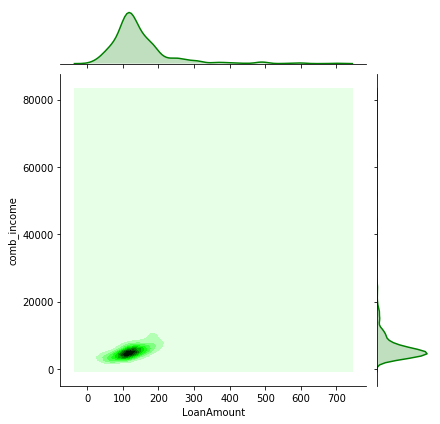

In [318]:
#Joint Plot with kind=kde
sns.jointplot(x='LoanAmount', y='comb_income', data=loan_df, kind='kde', color='green')

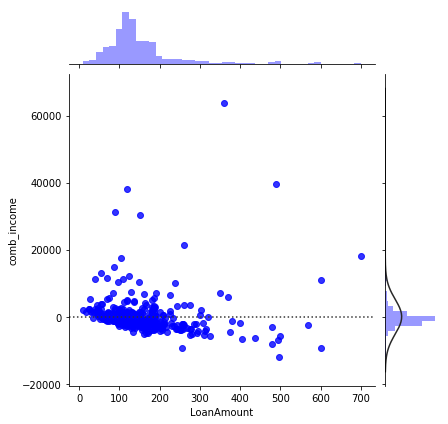

In [319]:
#Joint Plot with kind=resid
sns.jointplot(x='LoanAmount', y='comb_income', data=loan_df, kind='resid', color='blue')

In [320]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,comb_income,Status
409,LP002317,Male,Yes,3+,Graduate,No,360.0,360.0,0.0,Rural,81000.0,0
333,LP002101,Male,Yes,0,Graduate,No,490.0,180.0,1.0,Urban,63337.0,1
171,LP001585,Male,Yes,3+,Graduate,No,700.0,300.0,1.0,Urban,51763.0,1
185,LP001640,Male,Yes,0,Graduate,Yes,120.0,360.0,1.0,Semiurban,43897.0,1
155,LP001536,Male,Yes,3+,Graduate,No,600.0,180.0,0.0,Semiurban,39999.0,1


# Visualization of Categorical / Qualitative Variables(Univariate Analysis)

# Countplot

In [321]:
#Count by category- cross tabulation  (simply gives count of each categopry)
gender_dist = loan_df.groupby('Gender').size()
gender_dist

Gender
Female     95
Male      434
dtype: int64

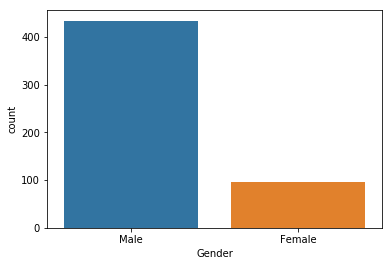

In [322]:
#distribution of categorical variables
#count plot
sns.countplot(loan_df.Gender)

#observation:
#1. Number of male applicants are much greater than female applicants

In [323]:
#Count by category- cross tabulation  (simply gives count of each categopry)
gender_dist = loan_df.groupby('Married').size()
gender_dist

Married
No     188
Yes    341
dtype: int64

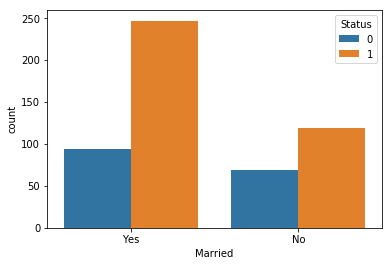

In [324]:
#distribution of categorical variables
#count plot
sns.countplot(data=loan_df,x= 'Married', hue='Status')

#observation:
#1. Married applicants are getting the loan approved compared to unmarried 

In [325]:
#Count by category- cross tabulation  (simply gives count of each categopry)
gender_dist = loan_df.groupby('Education').size()
gender_dist

Education
Graduate        421
Not Graduate    108
dtype: int64

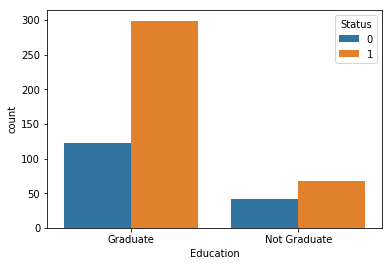

In [326]:
#distribution of categorical variables
#count plot
sns.countplot(data=loan_df,x= 'Education', hue='Status')

#observation:
#1. graduate applicants are getting loans approved compared to undergraduates

In [327]:
#Count by category- cross tabulation  (simply gives count of each categopry)
gender_dist = loan_df.groupby('Dependents').size()
gender_dist

Dependents
0     307
1      85
2      92
3+     45
dtype: int64

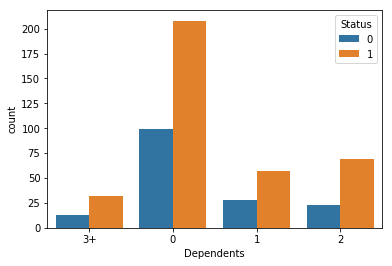

In [328]:
#distribution of categorical variables
#count plot
sns.countplot(data=loan_df,x= 'Dependents', hue='Status')

#observation:
#1. applicants with 0 dependents got the loan approved
#2. applicants with 3+ have very less number whose loan got approved
#3. applicants with 1 and 2 dependents are average compared to other two

In [329]:
#Count by category- cross tabulation  (simply gives count of each categopry)
gender_dist = loan_df.groupby('Self_Employed').size()
gender_dist

Self_Employed
No     459
Yes     70
dtype: int64

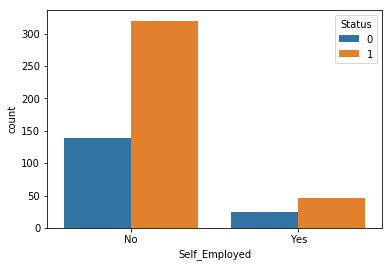

In [330]:
#distribution of categorical variables
#count plot
sns.countplot(data=loan_df,x= 'Self_Employed', hue='Status')

#observation:
#1. those who are not self employed, their loans approved as compared to who are self employed

In [331]:
#Count by category- cross tabulation  (simply gives count of each categopry)
gender_dist = loan_df.groupby('Property_Area').size()
gender_dist

Property_Area
Rural        155
Semiurban    209
Urban        165
dtype: int64

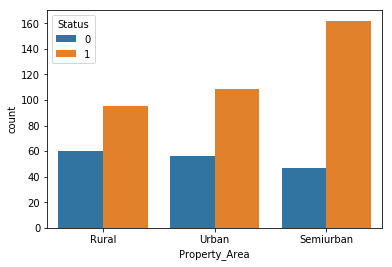

In [332]:
#distribution of categorical variables
#count plot
sns.countplot(data=loan_df,x= 'Property_Area', hue='Status')

#observation:
#1. numnber of Applicants having property area in semiurban > urban > rural
#2. applicants having semiurban property area have loans approved

In [333]:
#Count by category- cross tabulation  (simply gives count of each categopry)
gender_dist = loan_df.groupby('Status').size()
gender_dist

Status
0    163
1    366
dtype: int64

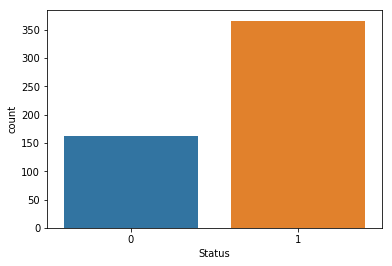

In [334]:
#distribution of categorical variables
#count plot
sns.countplot(loan_df.Status)

#observation:
#1. Loan is approved for more number of applicants(almost double than rejected)

# Bivariate Analysis (Category,Numerical)

# Boxplot, Swarmplot

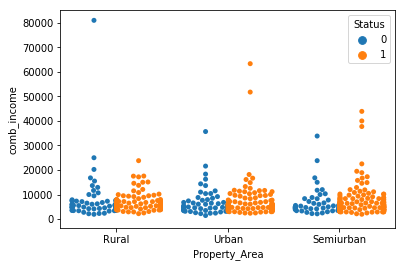

In [335]:
#Swarmplot
sns.swarmplot(x='Property_Area', y ='comb_income', hue ='Status', data=loan_df, split=True)

#Observation:
#1. We have few outliers in Urban and semiurban area
#2. Applicants whose property area is urban are more likely to get loan approved
#3. there is no effect on comb_income for property area

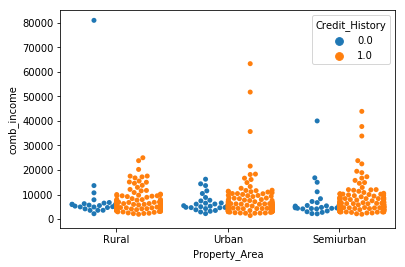

In [336]:
#Swarmplot
sns.swarmplot(x='Property_Area', y ='comb_income', hue ='Credit_History', data=loan_df, split=True)

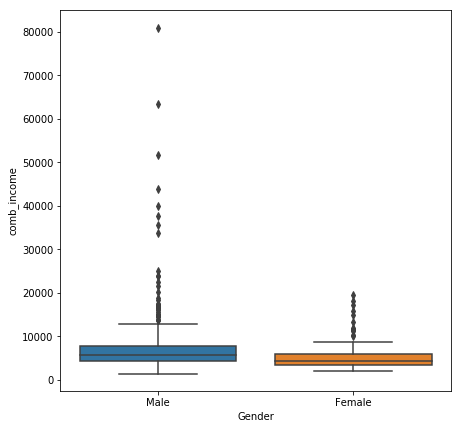

In [337]:
#boxplot for categorical variables
#box_gender = sns.boxplot(x='Gender', y='comb_income', data=loan_df, palette='Set1', linewidth=0.8, width=0.4, whis=5)
fig_size = (7, 7)
fig, ax = plt.subplots(figsize=fig_size)
box_gender = sns.boxplot(x='Gender', y='comb_income', data=loan_df, ax=ax)

#observation:
#1. there is more variation of combined income in female category compared to male
#2. Males having comb_income of approx. >12000 are outliers
#3. Females having comb_income of approx. >9500 are outliers

In [338]:
#gives total count, unique values of,top category,and no of records of top category
loan_df['Gender'].describe()

count      529
unique       2
top       Male
freq       434
Name: Gender, dtype: object

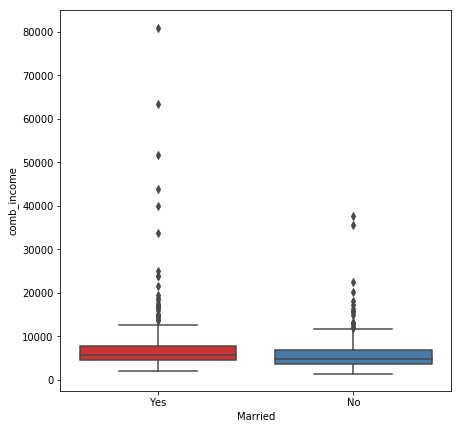

In [339]:
#boxplot for categorical variables
fig_size = (7, 7)
fig, ax = plt.subplots(figsize=fig_size)
box_married = sns.boxplot(x='Married', y='comb_income', data=loan_df, palette='Set1', ax=ax)

#observation:
#1. there is more variation of combined income in married category compared to not married
#2. Males having comb_income of approx. >12000 are outliers
#3. Females having comb_income of approx. >10000 are outliers

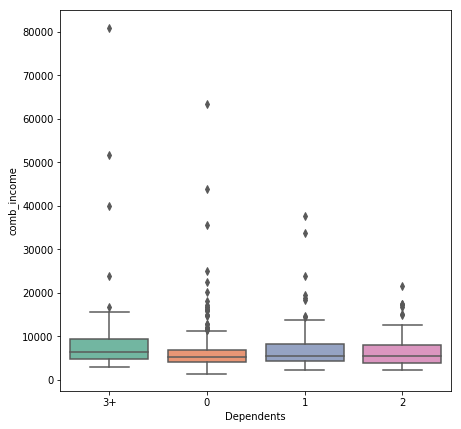

In [340]:
#boxplot for categorical variables
#box_dependents = sns.boxplot(x='Dependents', y='comb_income', data=loan_df, palette='Set2', linewidth=1.5, width=0.8)
fig_size = (7, 7)
fig, ax = plt.subplots(figsize=fig_size)
box_dependents = sns.boxplot(x='Dependents', y='comb_income', data=loan_df, palette='Set2', ax=ax)

#observation:
#1. there is more variation of combined income 3+ dependents
#2. For 1 dependent, data is equally centered

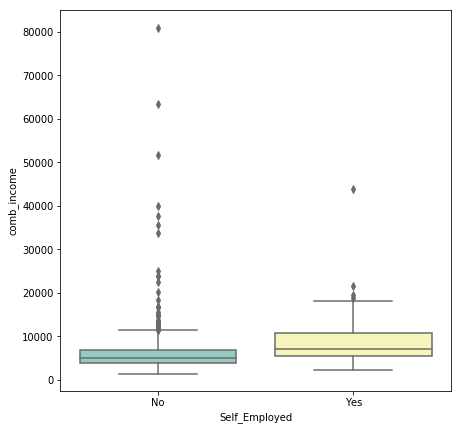

In [341]:
#boxplot for categorical variables
#box_self_employed = sns.boxplot(x='Self_Employed', y='comb_income', data=loan_df, palette='Set2', linewidth=1.5, width=0.8)
fig_size = (7, 7)
fig, ax = plt.subplots(figsize=fig_size)
box_self_employed = sns.boxplot(x='Self_Employed', y='comb_income', data=loan_df, palette='Set3', ax=ax)

#observation:
#1. Combined income of people who are not self_employed is higher than self_employed people
#2. variation of combined income is high in not self_employed category

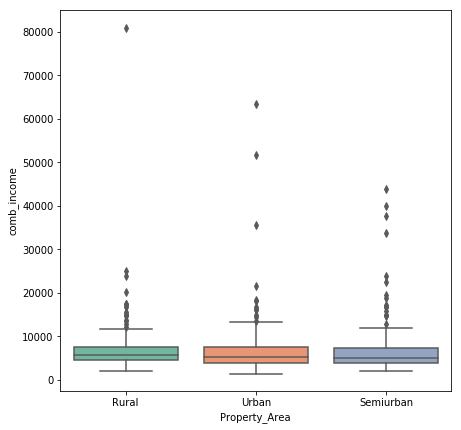

In [342]:
#boxplot for categorical variables
#box_prop_area = sns.boxplot(x='Property_Area', y='comb_income', data=loan_df, palette='Set2', linewidth=1.5, width=0.8)
fig_size = (7, 7)
fig, ax = plt.subplots(figsize=fig_size)
box_prop_area = sns.boxplot(x='Property_Area', y='comb_income', data=loan_df, palette='Set2', ax=ax)

#observation:
#1. Urban property area has more variation in comb_income and has more outliers than rural/semiurban 
#2. Rural and semiurban has approximately equal variance in comb_income

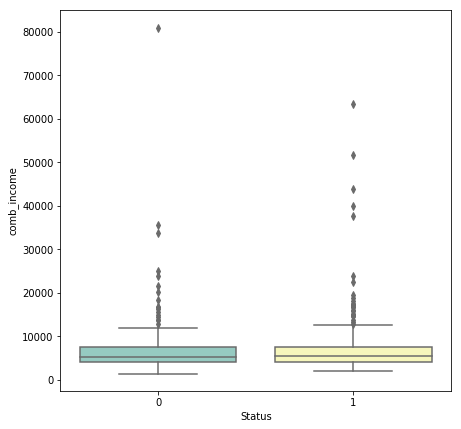

In [343]:
#boxplot for categorical variables
#box_com_inc = sns.boxplot(x='Status', y='comb_income', data=loan_df, palette='Set2', linewidth=1.5, width=0.8)
fig_size = (7, 7)
fig, ax = plt.subplots(figsize=fig_size)
box_com_inc = sns.boxplot(x='Status', y='comb_income', data=loan_df, palette='Set3', ax=ax)

#observation:
#1. Variation is almost equal in combined income for approved and rejected loans
#2. Outliers are high in comb_income for approved loans

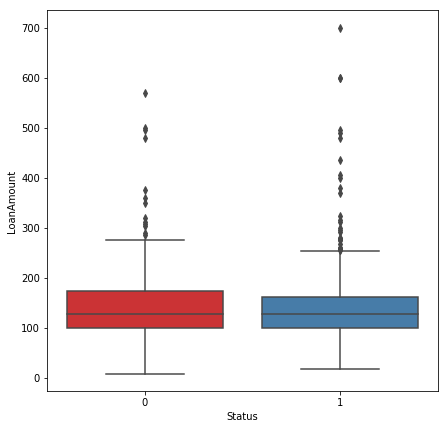

In [344]:
#boxplot for categorical variables
#box_Loan_Amt = sns.boxplot(x='Status', y='LoanAmount', data=loan_df, palette='Set2', linewidth=1.5, width=0.8)
fig_size = (7, 7)
fig, ax = plt.subplots(figsize=fig_size)
box_Loan_Amt = sns.boxplot(x='Status', y='LoanAmount', data=loan_df, palette='Set1', ax=ax)

#observation:
#1. Loan Amount varies according to status and the variation is more in rejected loans
#2. Outliers are more in approved loans

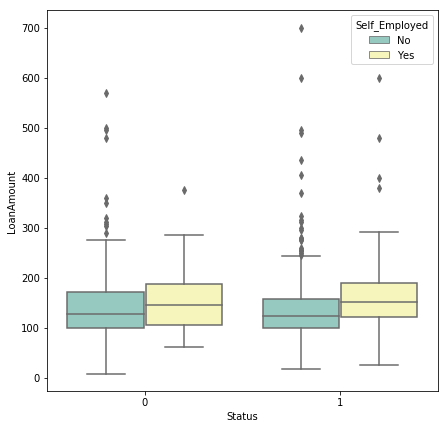

In [345]:
#boxplot for categorical variables
#box_Loan_amt_hue = sns.boxplot(x='Status', y='LoanAmount', hue='Self_Employed', data=loan_df, palette='Set2', linewidth=1.5, width=0.8)
fig_size = (7, 7)
fig, ax = plt.subplots(figsize=fig_size)
box_Loan_amt_hue = sns.boxplot(x='Status', y='LoanAmount', hue='Self_Employed', data=loan_df, palette='Set3', ax=ax)

#observation:
#1. Loan amount varies at some extent for self employed and not self employed people
#2. Doesnt really has any effect of   self employed and not self employed on loan approval or rejection

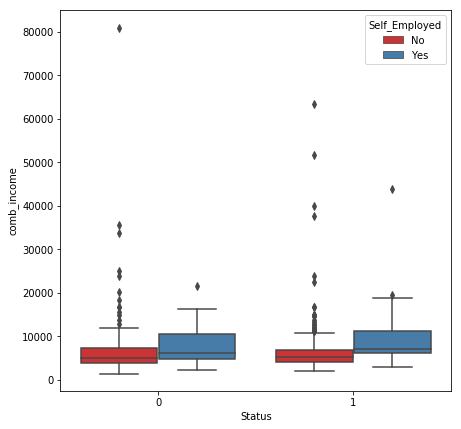

In [346]:
#boxplot for categorical variables
#box_comb_inc_hue = sns.boxplot(x='Status', y='comb_income', hue='Self_Employed', data=loan_df, palette='Set2', linewidth=1.5, width=0.8)
fig_size = (7, 7)
fig, ax = plt.subplots(figsize=fig_size)
box_comb_inc_hue = sns.boxplot(x='Status', y='comb_income', hue='Self_Employed', data=loan_df, palette='Set1', ax=ax)

#observation:
#1. comb_income varies alot of self employed and non self employed people
#2. no such effect of  self employed and not self employed on loan status 

# Barplot

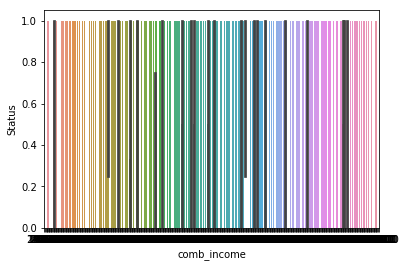

In [348]:
sns.barplot(x='comb_income', y='Status', data=loan_df)

In [349]:
sns.barplot(x='LoanAmount', y='Status', hue='Gender', data=loan_df, color='violet')

ValueError: Could not interpret input 'Loan_Status'

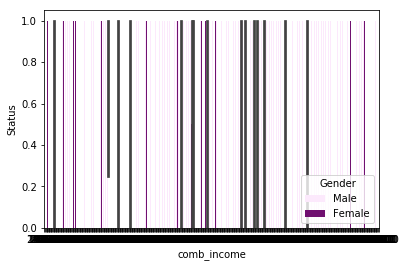

In [350]:
sns.barplot(x='comb_income', y='Status', hue='Gender' ,  data=loan_df, color='purple')

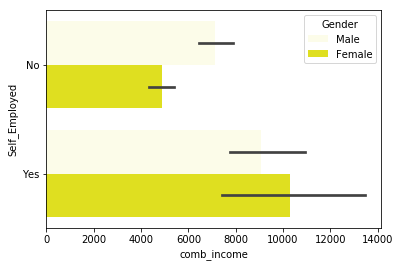

In [351]:
sns.barplot(x='comb_income', y='Self_Employed', hue='Gender' , data=loan_df, color='yellow')

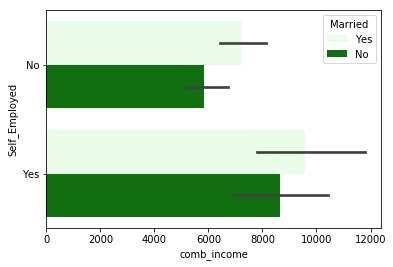

In [352]:
sns.barplot(x='comb_income', y='Self_Employed', hue='Married' , data=loan_df, color='green')

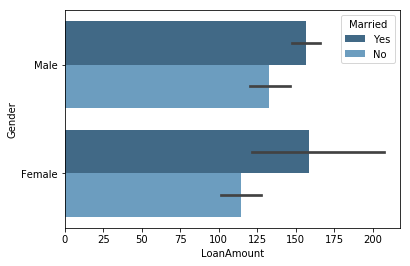

In [353]:
sns.barplot(x='LoanAmount', y='Gender', hue='Married' , data=loan_df, color='brown', palette='Blues_d')

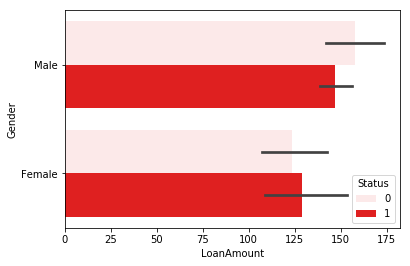

In [354]:
sns.barplot(x='LoanAmount', y='Gender', hue='Status' , data=loan_df, color='red')

In [355]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,comb_income,Status
409,LP002317,Male,Yes,3+,Graduate,No,360.0,360.0,0.0,Rural,81000.0,0
333,LP002101,Male,Yes,0,Graduate,No,490.0,180.0,1.0,Urban,63337.0,1
171,LP001585,Male,Yes,3+,Graduate,No,700.0,300.0,1.0,Urban,51763.0,1
185,LP001640,Male,Yes,0,Graduate,Yes,120.0,360.0,1.0,Semiurban,43897.0,1
155,LP001536,Male,Yes,3+,Graduate,No,600.0,180.0,0.0,Semiurban,39999.0,1


# Logistic Regression Model

In [356]:
loan_df.describe()

,LoanAmount,Loan_Amount_Term,Credit_History,comb_income,Status
count,529.000000,529.000000,529.000000,529.000000,529.000000
mean,145.852552,342.351607,0.850662,7050.217240,0.691871
std,84.108409,64.861662,0.356759,6589.393544,0.462157
min,9.000000,36.000000,0.000000,1442.000000,0.000000
25%,100.000000,360.000000,1.000000,4166.000000,0.000000
50%,128.000000,360.000000,1.000000,5332.000000,1.000000
75%,167.000000,360.000000,1.000000,7542.000000,1.000000
max,700.000000,480.000000,1.000000,81000.000000,1.000000


In [357]:
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'comb_income', 'Status'],
      dtype='object')

In [358]:
cols = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 
       'Property_Area', 'Status']

x = loan_df.drop(cols,axis=1)
y = loan_df['Status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=20)

logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

y_pred = logmodel.predict(x_test)
y_pred_prob = logmodel.predict_proba(x_test)
y_pred1 = logmodel.predict(x_train)

print(logmodel.intercept_ )
print(logmodel.coef_ )

print(classification_report(y_test , y_pred))
print(classification_report(y_train , y_pred1))

print(confusion_matrix(y_test,y_pred))
print(confusion_matrix(y_train,y_pred1))

print("test accuracy:",accuracy_score(y_test,y_pred )*100)
print("train accuracy:",accuracy_score(y_train,y_pred1)*100)


[-0.86199383]
[[ 2.23094590e+00 -1.22025013e-05]]
              precision    recall  f1-score   support

           0       0.95      0.40      0.56        48
           1       0.79      0.99      0.88       111

   micro avg       0.81      0.81      0.81       159
   macro avg       0.87      0.69      0.72       159
weighted avg       0.84      0.81      0.78       159

              precision    recall  f1-score   support

           0       0.90      0.46      0.61       115
           1       0.80      0.98      0.88       255

   micro avg       0.82      0.82      0.82       370
   macro avg       0.85      0.72      0.74       370
weighted avg       0.83      0.82      0.80       370

[[ 19  29]
 [  1 110]]
[[ 53  62]
 [  6 249]]
test accuracy: 81.13207547169812
train accuracy: 81.62162162162161


In [359]:
#new_loan= loan_df
#new_loan["Prediction"] = logmodel.predict(x)

#new_loan.head()

In [360]:
#new_loan.to_csv('out.csv',index=False)

In [361]:
#checking if the test data before and after data cleansing is consistent
y_test.value_counts(normalize=True)

1    0.698113
0    0.301887
Name: Status, dtype: float64

In [362]:
#checking if the train data before and after data cleansing is consistent
y_train.value_counts(normalize=True)

1    0.689189
0    0.310811
Name: Status, dtype: float64

In [363]:
loan_df.Status.value_counts(normalize=True)

1    0.691871
0    0.308129
Name: Status, dtype: float64

# probability cut off 

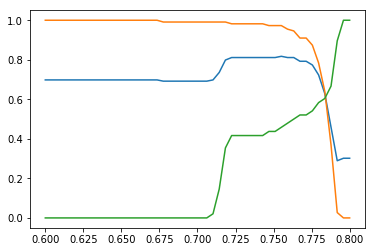

In [364]:
Sensitivity = []
Specificity = []
Accuracy = []
prob_range = np.linspace(0.6,0.8,50)
for pc in prob_range:
   y_pred_res = [1 if np.any(prob>=pc) else 0 for prob in y_pred_prob ]
   conf_mat = confusion_matrix(y_test,y_pred_res)
   Accuracy.append(accuracy_score(y_test,y_pred_res))
   Sensitivity.append(conf_mat[1,1]/(conf_mat[1,1] + conf_mat[1,0]))
   Specificity.append(conf_mat[0,0]/(conf_mat[0,0] + conf_mat[0,1]))

plt.plot(prob_range,Accuracy)
plt.plot(prob_range,Sensitivity)
plt.plot(prob_range,Specificity)
plt.show()

In [365]:
#the probability of being y=1 >= 0.78
y_pred = (logmodel.predict_proba(x_test)[:,1] >= 0.78).astype(bool)
y_pred

array([False,  True, False,  True, False,  True,  True,  True,  True,
       False, False,  True, False,  True,  True, False,  True,  True,
        True,  True, False,  True, False,  True, False,  True, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True, False,
        True,  True,  True, False,  True, False,  True,  True, False,
       False,  True, False,  True, False,  True,  True, False, False,
        True,  True, False, False,  True,  True,  True, False, False,
        True,  True, False, False, False,  True, False,  True, False,
       False, False,  True, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True, False,  True,  True,  True, False, False, False,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
        True,  True,

# ROC curve

AUC: 0.663


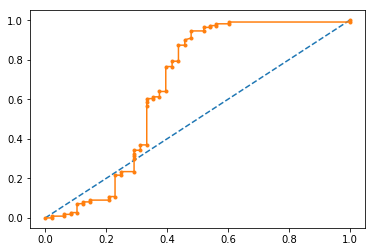

In [366]:
cols = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 
       'Property_Area', 'Status']

x = loan_df.drop(cols,axis=1)
y = loan_df['Status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=20)

#instantiate the classifier
logmodel = LogisticRegression()

#fit a model
logmodel.fit(x_train, y_train)

#predict probabilities and keep probabilities for the positive outcome only
probs = logmodel.predict_proba(x_test)[:,1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

#calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

#plot NO skill
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()


# Precision Recall curve

f1=0.880 auc=0.663 ap=0.731


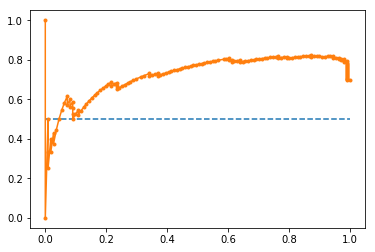

In [367]:
cols = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 
       'Property_Area', 'Status']

x = loan_df.drop(cols,axis=1)
y = loan_df['Status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=20)

#instantiate the classifier
logmodel = LogisticRegression()

#fit a model
logmodel.fit(x_train, y_train)

#predict probabilities and keep probabilities for the positive outcome only
probs = logmodel.predict_proba(x_test)[:,1]

#predict class values
y_pred = logmodel.predict(x_test)

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# calculate F1 score
f1 = f1_score(y_test, y_pred)

# calculate precision-recall AUC
#auc = auc(recall, precision)

# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

# show the plot
plt.show()

In [368]:
#help(roc_auc_score)

# KNN Starts Here

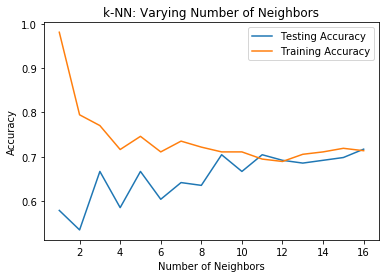

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1]
test score: 0.7169811320754716 train score: 0.7135135135135136


In [369]:
cols = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 
       'Property_Area', 'Status',]

x = loan_df.drop(cols,axis=1)
y = loan_df['Status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=20)

neighbors = np.arange(1, 17)
train_accuracy = np.empty(len(neighbors))   # creates an empty array of size 9
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train) 
    train_accuracy[i] = knn.score(x_train,y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


#took the appropriate value of k
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print(y_pred)
score = knn.score(x_test, y_test)
score1 = knn.score(x_train, y_train)
print("test score:",score, "train score:",score1)

In [370]:
print(confusion_matrix(y_test , y_pred))

pd.crosstab(y_test , y_pred , rownames=["True"], colnames=["Predicted"] ,margins=True)

[[  9  39]
 [  6 105]]


Predicted,0,1,All
True,,,
0,9,39,48
1,6,105,111
All,15,144,159


In [371]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.60      0.19      0.29        48
           1       0.73      0.95      0.82       111

   micro avg       0.72      0.72      0.72       159
   macro avg       0.66      0.57      0.55       159
weighted avg       0.69      0.72      0.66       159



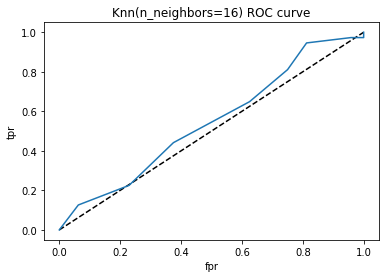

In [372]:
y_pred_proba = knn.predict_proba(x_test)[:,1]

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=16) ROC curve')
plt.show()

In [373]:
#import GridSearchCV

from sklearn.model_selection import GridSearchCV

#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors': np.arange(1,150)}

knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid)
knn_cv.fit(x,y)

print("KNN Best Score : " , knn_cv.best_score_)

print("KNN Best K Fit : " , knn_cv.best_params_)


KNN Best Score :  0.6918714555765595
KNN Best K Fit :  {'n_neighbors': 33}


# validation

In [374]:
knnf = KNeighborsClassifier()

knnf.fit(x,y)

y_pred = knnf.predict(x)

y_pred.shape

(529,)

In [375]:
loan_df["Prediction"] = y_pred

In [376]:
pd.pivot_table (  data  = loan_df , index="Status" ,  aggfunc='count')

,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Married,Prediction,Property_Area,Self_Employed,comb_income
Status,,,,,,,,,,,,
0,163,163,163,163,163,163,163,163,163,163,163,163
1,366,366,366,366,366,366,366,366,366,366,366,366


# Conclusion

In [378]:
#This concludes that logistic regression model best suits this loan status prediction problem.

#for any queries reach me @pallavivibhute31@gmail.com.